In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the data
data=pd.read_csv("/content/drive/MyDrive/Project/final_data.csv")
#explore the data
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [4]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Changing the column names

In [6]:
data.columns=['text','product','emotion']
data.head()

,text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   product  3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Dealing with null values, creating the heatmap


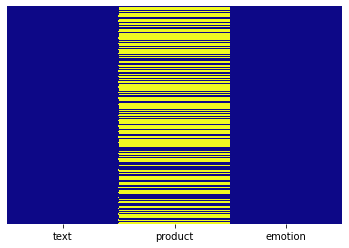

In [8]:
sns.heatmap(data.isnull(),cmap='plasma',cbar=False,yticklabels=False)

Product has a lot of null values as we can see from above. We have decided to drop this column


In [9]:
data.drop('product',axis=1,inplace=True)
data.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [10]:
data.isnull().sum()

text       1
emotion    0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   emotion  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


All the null values have been removed from the dataset . We would be doing the text processing now

TEXT PROCESSING

In [13]:
data.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


Emotion column

In [14]:
data['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [15]:
# combining "I can't tell" with "No emotion toward brand or product" as similar meaning
data['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True)

In [16]:
data['emotion'].value_counts()

No emotion toward brand or product    5544
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [17]:
# mapping each of the types to a numeric value
# "Negative emotion" -----> 0
# "No emotion toward brand or product" -----> 1
# "Positive emotion" -----> 2
data['emotion']=data['emotion'].map({"Negative emotion":0,"No emotion toward brand or product":1,"Positive emotion":2})

In [18]:
data['emotion'].value_counts()

1    5544
2    2978
0     570
Name: emotion, dtype: int64

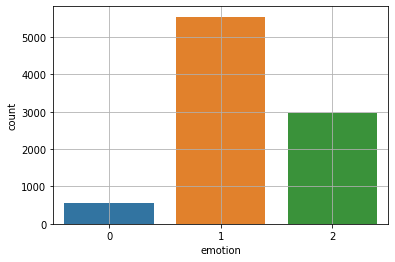

In [19]:
sns.countplot(x='emotion',data=data)
plt.grid()

Text column

In [20]:
import re

In [22]:
# converting the text to lowercase
data['text']=data['text'].apply(lambda x:x.lower())

In [23]:
data.head()

,text,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [25]:
# removing hyperlinks from the text
data['text']=data['text'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))

In [26]:
# removing non alphabetical characters from the text
data['text']=data['text'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))

In [27]:
data.head()

,text,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [28]:
# multiple spaces to a single space
data['text']=data['text'].apply(lambda x:" ".join(x.split()))

In [29]:
# adding a column of length for better insights
data['length']=data['text'].apply(len)

In [30]:
data.head(3)

,text,emotion,length
0,wesley i have a g iphone after hrs tweeting at...,0,112
1,jessedee know about fludapp awesome ipad iphon...,2,132
2,swonderlin can not wait for ipad also they sho...,2,72


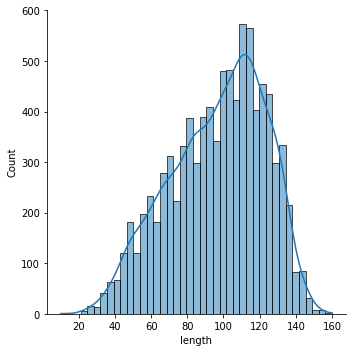

In [31]:
# distribution of the length of the reviews
sns.displot(data['length'],kde=True)

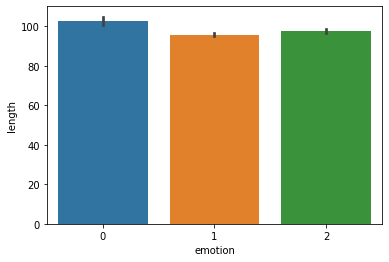

In [32]:
sns.barplot(x='emotion',y='length',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96a62df250>,
      dtype=object)

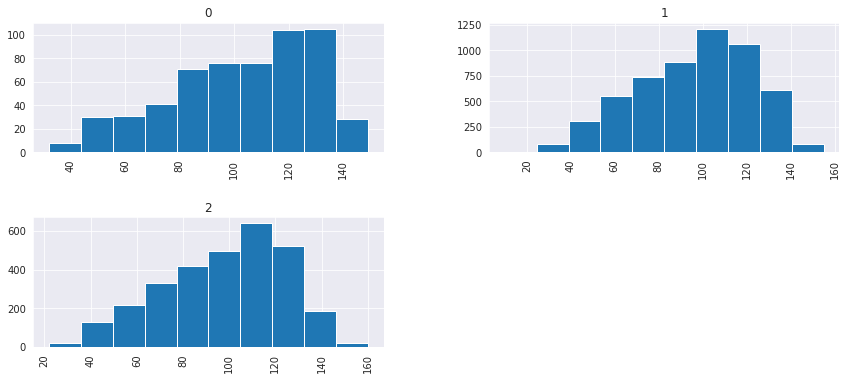

In [33]:
# Histogram for text length and emotion
sns.set_style('darkgrid')
data.hist(column='length',by='emotion',figsize=(14,6))

Tokenizing and removing stopwords

In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
def stopwords_removal(text):
    return [w for w in text.split() if w not in stopwords.words('english')]

In [46]:
data['text']=data['text'].apply(stopwords_removal)

In [47]:
data.head()

,text,emotion,length
0,"[wesley, g, iphone, hrs, tweeting, rise, austi...",0,112
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2,132
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2,72
3,"[sxsw, hope, year, festival, crashy, year, iph...",0,79
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2,119


In [48]:
#dropping the length column
data.drop('length',axis=1,inplace=True)

In [49]:
from nltk.stem import WordNetLemmatizer

In [50]:
def lemmatizer(text):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(w) for w in text]

In [51]:
data.head()

,text,emotion
0,"[wesley, g, iphone, hrs, tweeting, rise, austi...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [52]:
# removing one length words and the word "sxsw"
def one_letter_word_removal(text):
    return [w for w in text if len(w)>1 and w!="sxsw"]

data['text']=data['text'].apply(one_letter_word_removal)
data.head(3)

,text,emotion
0,"[wesley, iphone, hrs, tweeting, rise, austin, ...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale]",2


In [53]:
# joining the list of words to form the review
data['text']=data['text'].apply(lambda x:" ".join(x))
data.head()

,text,emotion
0,wesley iphone hrs tweeting rise austin dead ne...,0
1,jessedee know fludapp awesome ipad iphone app ...,2
2,swonderlin wait ipad also sale,2
3,hope year festival crashy year iphone app,0
4,sxtxstate great stuff fri marissa mayer google...,2


Bag of Words transformer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# fitting the bow transformer to the text column and transforming it
bow_transformer=CountVectorizer().fit(data['text'])

In [56]:
# total number of different words present in the corpus
print(len(bow_transformer.vocabulary_))

9111


So there are 9111 unique words in the entire text column

In [57]:
sample_text=data['text'][0]
sample_text

'wesley iphone hrs tweeting rise austin dead need upgrade plugin stations'

In [58]:
# vector representation of the sample_text
bow_sample=bow_transformer.transform([sample_text])
print(bow_sample)

  (0, 501)	1
  (0, 1948)	1
  (0, 3806)	1
  (0, 4140)	1
  (0, 5304)	1
  (0, 5995)	1
  (0, 6742)	1
  (0, 7575)	1
  (0, 8388)	1
  (0, 8527)	1
  (0, 8821)	1


In [59]:
# applying the bow transformer to the entire column
text_bow=bow_transformer.transform(data['text'])

In [60]:
print("The shape of the matrix is: ",text_bow.shape)
# 9092 different reviews and 7046 unique words in the entire corpus

The shape of the matrix is:  (9092, 9111)


In [61]:
print("The number of non zero values in the matrix: ",text_bow.nnz)

The number of non zero values in the matrix:  94485


In [62]:
print("Sparcity of the matrix: ",100*text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))

Sparcity of the matrix:  0.1140610574870627


The matrix is very sparse since most of the values would be zero

Term Frequency - Inverse Document Frequency (Tf-Idf) Transformer

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf_sample=tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 8821)	0.3960995147615853
  (0, 8527)	0.31429471502887685
  (0, 8388)	0.2836800411142377
  (0, 7575)	0.3790540247714683
  (0, 6742)	0.3244330113785881
  (0, 5995)	0.35757924708412253
  (0, 5304)	0.20335045769144527
  (0, 4140)	0.11603946514250471
  (0, 3806)	0.3499145671667452
  (0, 1948)	0.301456668680382
  (0, 501)	0.13753216623706316


In [65]:
# applying the tfidf_transformer to the entire column
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(9092, 9111)


Train Test Split

In [66]:
X=data['text']
y=data['emotion']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# splitting the dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [69]:
print(len(X_train),len(X_test),len(X_train)+len(X_test))

6819 2273 9092


Model Creation and Evaluation

The task of Bag-of-Words transformer followed by the Tf-Idf transformer and model creation can all be done in one single step using a pipeline provided by Scikit Learn

In [70]:
from sklearn.pipeline import Pipeline

Multinomial Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
pipe1=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',MultinomialNB())  # classification algorithm
])

In [73]:
# fitting the pipeline
pipe1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [74]:
# making predictions
predictions_nb=pipe1.predict(X_test)

In [75]:
predictions_nb

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
def metrics(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    print("\n")
    print(confusion_matrix(y_true,y_pred))

In [78]:
metrics(y_test,predictions_nb)

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       148
           1       0.64      0.95      0.76      1367
           2       0.66      0.22      0.32       758

    accuracy                           0.64      2273
   macro avg       0.60      0.39      0.37      2273
weighted avg       0.64      0.64      0.57      2273



[[   1  136   11]
 [   1 1293   73]
 [   0  595  163]]


LOGISTIC REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
pipe2=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',LogisticRegression())  # classification algorithm
])

In [81]:
pipe2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [82]:
predictions_lg=pipe2.predict(X_test)

In [83]:
metrics(y_test,predictions_lg)

              precision    recall  f1-score   support

           0       0.75      0.08      0.15       148
           1       0.69      0.87      0.77      1367
           2       0.62      0.44      0.52       758

    accuracy                           0.68      2273
   macro avg       0.69      0.47      0.48      2273
weighted avg       0.67      0.68      0.65      2273



[[  12  106   30]
 [   3 1189  175]
 [   1  420  337]]


RANDOM FOREST CLASSIFIER

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
pipe3=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',RandomForestClassifier(n_estimators=400))  # classification algorithm
])

In [86]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=400))])

In [87]:
predictions_rf=pipe3.predict(X_test)

In [88]:
metrics(y_test,predictions_rf)

              precision    recall  f1-score   support

           0       0.79      0.20      0.32       148
           1       0.68      0.88      0.77      1367
           2       0.64      0.38      0.48       758

    accuracy                           0.67      2273
   macro avg       0.70      0.49      0.52      2273
weighted avg       0.67      0.67      0.64      2273



[[  30  105   13]
 [   7 1208  152]
 [   1  469  288]]


SVM

In [89]:
from sklearn.svm import SVC

In [90]:
pipe4=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',SVC())  # classification algorithm
])

In [91]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [92]:
predictions_svc=pipe4.predict(X_test)

In [93]:
metrics(y_test,predictions_svc)

              precision    recall  f1-score   support

           0       0.88      0.15      0.25       148
           1       0.69      0.89      0.78      1367
           2       0.66      0.42      0.51       758

    accuracy                           0.69      2273
   macro avg       0.74      0.49      0.52      2273
weighted avg       0.69      0.69      0.66      2273



[[  22  104   22]
 [   3 1222  142]
 [   0  441  317]]


Hyper-Parameter Tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# For using RandomizedSearchCV we would need to specify the parameters and their corresponding values on which it would work
# and find the best values

C=[0.1,1,10,20,50,100]
gamma=[0.0001,0.001,0.1,1,10]
kernel=['rbf','linear','sigmoid']

In [96]:
random_grid = {'C': C,
               'gamma': gamma,
               'kernel': kernel}

In [97]:
model_svc_tuned=SVC()

In [98]:
SVC_tuned = RandomizedSearchCV(estimator = model_svc_tuned, 
                               param_distributions = random_grid, 
                               n_iter = 40, cv = 3, verbose=2, 
                               random_state=42,n_jobs=-1)

In [101]:
# we need to split the data based on the tfidf transformed matrix which earlier was done as part of the pipeline
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = train_test_split(text_tfidf, data['emotion'], test_size=0.25)

In [102]:
SVC_tuned.fit(X_train_tuned,y_train_tuned)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 20, 50, 100],
                                        'gamma': [0.0001, 0.001, 0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'sigmoid']},
                   random_state=42, verbose=2)

In [105]:
SVC_tuned.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [106]:
predictions_svc_tuned=SVC_tuned.predict(X_test_tuned)

In [107]:
metrics(y_test_tuned,predictions_svc_tuned)

              precision    recall  f1-score   support

           0       0.68      0.09      0.17       159
           1       0.70      0.91      0.79      1364
           2       0.69      0.44      0.54       750

    accuracy                           0.70      2273
   macro avg       0.69      0.48      0.50      2273
weighted avg       0.69      0.70      0.66      2273



[[  15  119   25]
 [   5 1238  121]
 [   2  418  330]]
